In [ ]:
En primer lugar, se deben importar las librerías necesarias para la elaboración de los gráficos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import plotly
plotly

<module 'plotly' from 'C:\\Users\\Lau\\AppData\\Roaming\\Python\\Python311\\site-packages\\plotly\\__init__.py'>

Leer el DataFrame haciendo uso de la librería Pandas y adicionalmente se agrega un index para cada fila del dataframe

In [3]:
df = pd.read_csv("Mens_Tennis_Grand_Slam_Winner.csv")
df.reset_index(level = 0, inplace = True)
df['index'] += 1
df

,index,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,1,2023,Australian Open,Novak Djokovic,Stefanos Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2,2022,U.S. Open,Carlos Alcaraz,Casper Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,3,2022,Wimbledon,Novak Djokovic,Nick Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2507460.0
3,4,2022,French Open,Rafael Nadal,Casper Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,5,2022,Australian Open,Rafael Nadal,Daniil Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0
...,...,...,...,...,...,...,...,...,...,...,...
287,288,1951,Australian Open,Dick Savitt,Ken McGregor,American,NaN,NaN,right,Grass,NaN
288,289,1950,U.S. Open,Arthur Larsen,Herbert Flam,American,NaN,NaN,right,outdoors,NaN
289,290,1950,Wimbledon,J.E. Patty,Frank Sedgman,American,NaN,NaN,right,Grass / Outdoor,NaN
290,291,1950,French Open,Budge Patty,Jaroslav Drobny,American,NaN,NaN,right,Clay,NaN


Rellenar los valores nulos con ceros usando fillna(0) creando un nuevo dataframe con los datos actualizados

In [55]:
filtered_df = df.fillna(0)
filtered_df

,index,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,1,2023,Australian Open,Novak Djokovic,Stefanos Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2,2022,U.S. Open,Carlos Alcaraz,Casper Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,3,2022,Wimbledon,Novak Djokovic,Nick Kyrgios,Serbian,0.0,25.0,right,Grass / Outdoor,2507460.0
3,4,2022,French Open,Rafael Nadal,Casper Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,5,2022,Australian Open,Rafael Nadal,Daniil Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0
...,...,...,...,...,...,...,...,...,...,...,...
287,288,1951,Australian Open,Dick Savitt,Ken McGregor,American,0.0,0.0,right,Grass,0.0
288,289,1950,U.S. Open,Arthur Larsen,Herbert Flam,American,0.0,0.0,right,outdoors,0.0
289,290,1950,Wimbledon,J.E. Patty,Frank Sedgman,American,0.0,0.0,right,Grass / Outdoor,0.0
290,291,1950,French Open,Budge Patty,Jaroslav Drobny,American,0.0,0.0,right,Clay,0.0


¿Quien es la persona con más cantidad de partidos ganados?
Para responder esta pregunta es necesario filtrar la siguiente información:
Se crea una nueva variable llamada winners la cual toma del dataframe filtered_df la columna 'WINNER' en la cual se cuentan usando el método value_counts() los valores de la columna que indican que jugador ganó cada partido, luego en la variable jugador_con_mas_victorias se busca el índice, es decir, el nombre del jugador que haya ganado la mayor cantidad de partidos y esto se hace por medio del método idmax().
Por otro lado, se tiene la variable cantidad_de_victorias en la cual se almacena el valor máximo en la columna 'WINNER' que representa la cantidad total de partidos ganados por un jugador. Después, en la variable top10 se muestran los 10 jugadores con más victorias en cada partido y por último se imprime el contenido de dicha variable.

In [5]:
winners = filtered_df ["WINNER"].value_counts()
jugador_con_mas_victorias = winners.idxmax()
cantidad_de_victorias = winners.max()
top10 = winners.head(10)
top10

WINNER
Novak Djokovic    22
Rafael Nadal      22
Roger Federer     20
Pete Sampras      14
Roy Emerson       12
Rod Laver         11
Bjorn Borg        11
Ken Rosewall       8
Andre Agassi       8
Ivan Lendl         8
Name: count, dtype: int64

Para crear el gráfico se hace uso la la librería matplotlib. El primer paso es crear una figura con un tamaño de 8x8 para distribuir la información en este espacio, luego se configura la paleta de colores de seaborn con "Set3" que ya es una paleta establecida por la librería. Posteriormente usando la función plt.pie se crea el gráfico circular y se le pasan los siguientes parámetros: top10 que es la cantidad de partidos ganados por los 10 mejores jugadores, labels=top10.index que son las etiquetas de los nombres de los jugadores, startangle=90 que es el ángulo de inicio para dibujar el gráfico y autopct='%.1f%% muestra los porcentajes de los partidos ganados con un solo decimal.
Por último para darle formato al texto se establece el título del gráfico y se establece un tamaño de letra de 16, con negrilla y en color verde.
Finalmente se imprime el gráfico con plt.show()

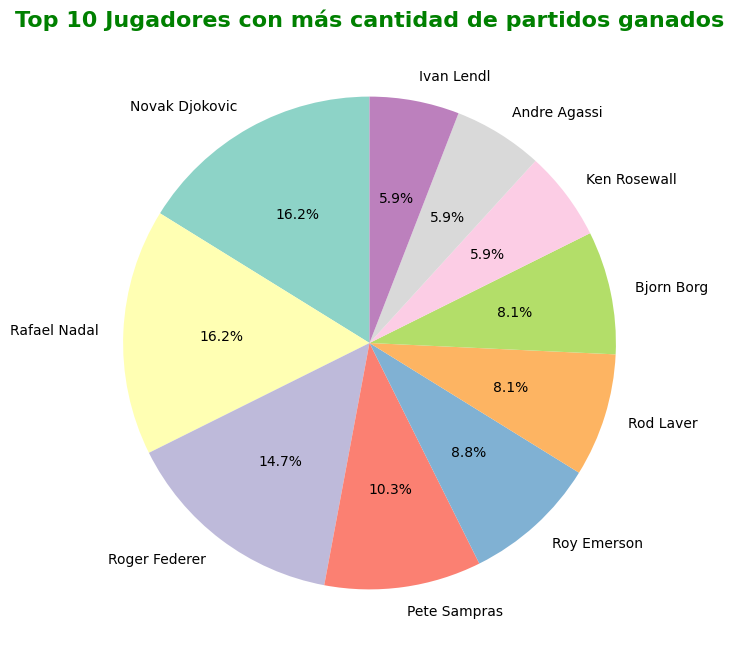

In [6]:
plt.figure(figsize=(8, 8))
sns.set_palette("Set3") 
plt.pie(top10, labels=top10.index, startangle=90, autopct='%.1f%%')
plt.title('Top 10 Jugadores con más cantidad de partidos ganados', fontsize=16, fontweight='bold', color='green')
plt.show()

¿Cuál es el torneo de Grand Slam que con más frecuencia se organiza?
En primer lugar se le asigna a la variable agrupado el dataframe que esta agrupado por la columna 'TOURNAMENT', luego la función size() se usa para contar el numero de registros en cada grupo, es decir, cada valor representa el número de veces que aparece un valor único en la columna 'TOURNAMENT', posteriormente la función reset_index se utiliza para restablecer el índice del dataset resultante, además tiene como argumento (name='CONTEO_INDEX') y se crea una renombrar la nueva columna llamada 'CONTEO_INDEX'. Luego se imprime la agrupación de los datos.

In [7]:
agrupado = filtered_df.groupby(['TOURNAMENT']).size().reset_index(name='CONTEO_INDEX')
agrupado

,TOURNAMENT,CONTEO_INDEX
0,Australian Open,72
1,Australian Open (Dec),1
2,Australian Open (Jan),1
3,French Open,73
4,U.S. Open,73
5,Wimbledon,72


Para la elaboración del gráfico se utilizó la librería de Seaborn, inicialmente se utilizó el dataset anterior 'agrupado' el cual se ordena por medio de la columna 'CONTEO_INDEX' en orden descendente, lo que significa que los torneos se ordenan de mayor a menor. luego con plt.figure(figsize=(10, 6)) se crea una figura para el gráfico con un tamaño de 10x6, después con sns.set(style="whitegrid") se configura el estilo de fondo del gráfico utilizando líneas de cuadrícula blanca, posteriormente se crea el gráfico de barras utilizando sns.barplot y tiene los siguientes parámetros: en el eje x se asigna el 'CONTEO_INDEX' y en el eje y se asigna 'TOURNAMENT' y se utiliza una paleta de colores predeterminada llamada 'vidiris' para las barras.
Luego, se establece el título del gráfico con plt.title con un tamaño de fuente de 16, en negrilla y con color púrpura, también se añaden las etiquetas para ambos ejes con un tamaño de fuente 14 y por último se utiliza un bucle for para recorrer todas las barras del gráfico y se obtiene el ancho de cada barra con width = p.get_width() y se coloca texto al extremo izquierdo de cada una de las barras con el valor correspondiente utilizando plt.text(). Por otro lado, el plt.tight_layout() ajusta el diseño gráfico para asegurarse que todos los elementos esten bien distribuidos. Finalmente se muestra el gráfico con plt.show().

C:\Users\Lau\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lau\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lau\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


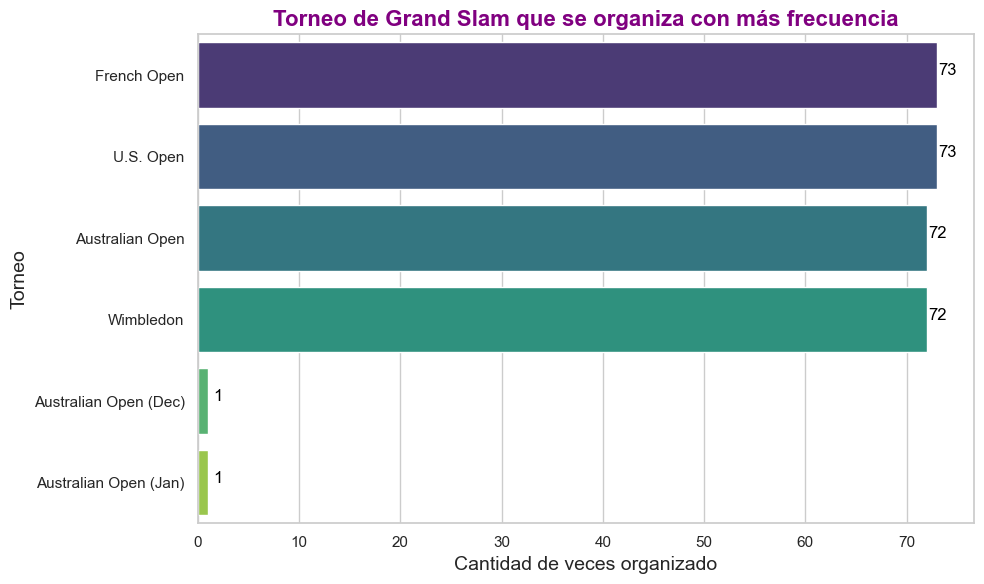

In [8]:

agrupado = agrupado.sort_values(by='CONTEO_INDEX', ascending=False)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='CONTEO_INDEX', y='TOURNAMENT', data=agrupado, palette='viridis')

plt.title('Torneo de Grand Slam que se organiza con más frecuencia', fontsize=16, fontweight='bold', color='purple')
plt.xlabel('Cantidad de veces organizado', fontsize=14)
plt.ylabel('Torneo', fontsize=14)

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{int(width)}', ha="center", fontsize=12, color='black')

plt.tight_layout()
plt.show()



¿Cómo han cambiado los premios a lo largo de los años para los torneos U.S. open, French Open y Australian Open?

En primer lugar se toma el dataframe filtrado y con la función .sort_values() se ordenan los datos por el año y se muestra el dataframe

In [53]:
filtered_df = filtered_df.sort_values('YEAR')
filtered_df 

,index,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
291,292,1950,Australian Open,Frank Sedgman,Ken McGregor,Australian,0.0,0.0,right,Grass,0.0
288,289,1950,U.S. Open,Arthur Larsen,Herbert Flam,American,0.0,0.0,right,outdoors,0.0
290,291,1950,French Open,Budge Patty,Jaroslav Drobny,American,0.0,0.0,right,Clay,0.0
289,290,1950,Wimbledon,J.E. Patty,Frank Sedgman,American,0.0,0.0,right,Grass / Outdoor,0.0
284,285,1951,U.S. Open,Frank Sedgman,"E. Victor Seixas, Jr.",Australian,0.0,0.0,right,outdoors,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4,5,2022,Australian Open,Rafael Nadal,Daniil Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0
3,4,2022,French Open,Rafael Nadal,Casper Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
2,3,2022,Wimbledon,Novak Djokovic,Nick Kyrgios,Serbian,0.0,25.0,right,Grass / Outdoor,2507460.0
1,2,2022,U.S. Open,Carlos Alcaraz,Casper Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0


Luego se crea otro dataframe llamado fitered_nac en el cual se almacena el dataframe filtrado que indica que solo debe tomar la columna 'YEAR' y que muestre los datos a partir de 1980 en adelante, esto se aplica con el fin de eliminar los años anteriores ya que muchos de sus valores son cero, por lo cual no tienen ninguna relevancia al momento de hacer la gráfica.

In [56]:
filtered_nac = filtered_df[(filtered_df['YEAR'] >= 1980)]
filtered_nac

,index,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,1,2023,Australian Open,Novak Djokovic,Stefanos Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2,2022,U.S. Open,Carlos Alcaraz,Casper Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,3,2022,Wimbledon,Novak Djokovic,Nick Kyrgios,Serbian,0.0,25.0,right,Grass / Outdoor,2507460.0
3,4,2022,French Open,Rafael Nadal,Casper Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,5,2022,Australian Open,Rafael Nadal,Daniil Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0
...,...,...,...,...,...,...,...,...,...,...,...
166,167,1981,French Open,Bjorn Borg,Ivan Lendl,Swedish,0.0,0.0,right,Clay,250000.0
167,168,1980,Australian Open,Brian Teacher,Kim Warwick,American,0.0,0.0,right,Grass,64000.0
168,169,1980,U.S. Open,John McEnroe,Bjorn Borg,American,0.0,0.0,left,DecoTurf - outdoors,46000.0
169,170,1980,Wimbledon,Bjorn Borg,John McEnroe,Swedish,0.0,0.0,right,Grass / Outdoor,20000.0


Luego se crea una variable llamada Torneos en la cual se almacena los 3 torneos que se están analizando los cuales son 'U.S. Open', 'French Open', 'Australian Open', luego se crea una variable llamada filtered_nac en la cual se toma la columna 'TOURNAMENT' y el método .isin es para seleccionar las filas en función de los valores de la columna que coinciden con una lista de valores específicos, en este caso 'Torneos', luego se muestra el dataframe.

In [57]:
Torneos = ['U.S. Open', 'French Open', 'Australian Open']
df_torneos= filtered_nac[filtered_nac['TOURNAMENT'].isin(Torneos)]
df_torneos

,index,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,1,2023,Australian Open,Novak Djokovic,Stefanos Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2,2022,U.S. Open,Carlos Alcaraz,Casper Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
3,4,2022,French Open,Rafael Nadal,Casper Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,5,2022,Australian Open,Rafael Nadal,Daniil Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0
5,6,2021,U.S. Open,Daniil Medvedev,Novak Djokovic,Russian,2.0,1.0,right,DecoTurf - outdoors,2500000.0
...,...,...,...,...,...,...,...,...,...,...,...
164,165,1981,U.S. Open,John McEnroe,Bjorn Borg,American,0.0,0.0,left,DecoTurf - outdoors,66000.0
166,167,1981,French Open,Bjorn Borg,Ivan Lendl,Swedish,0.0,0.0,right,Clay,250000.0
167,168,1980,Australian Open,Brian Teacher,Kim Warwick,American,0.0,0.0,right,Grass,64000.0
168,169,1980,U.S. Open,John McEnroe,Bjorn Borg,American,0.0,0.0,left,DecoTurf - outdoors,46000.0


Para la creación del gráfico se utiliza plt.figure(figsize=(12, 6)) se crea una figura para el gráfico con un tamaño de 12x6, luego se utiliza la librería seaborn con sns.lineplot y se le pasan los siguientes parámetros: el dataframe donde se filtraron cada uno de los 3 torneos y se definen en el eje x el año del torneo y en el eje y el precio del jugador, luego con hue se analiza cada uno de los torneos con linewidth se le da un grosor a la línea de 3.0 con palette se establece una paleta de colores para cada una de las líneas del gráfico, posteriormente se asigna un título para el gráfico con plt.title y se le asignas las etiquetas de texto tanto para el eje x como para el eje y (año vs cantidad de dinero ganado), luego con plt.gca se utiliza para darle formato a los números y ponerle más cifras.

C:\Users\Lau\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lau\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lau\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lau\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

[]

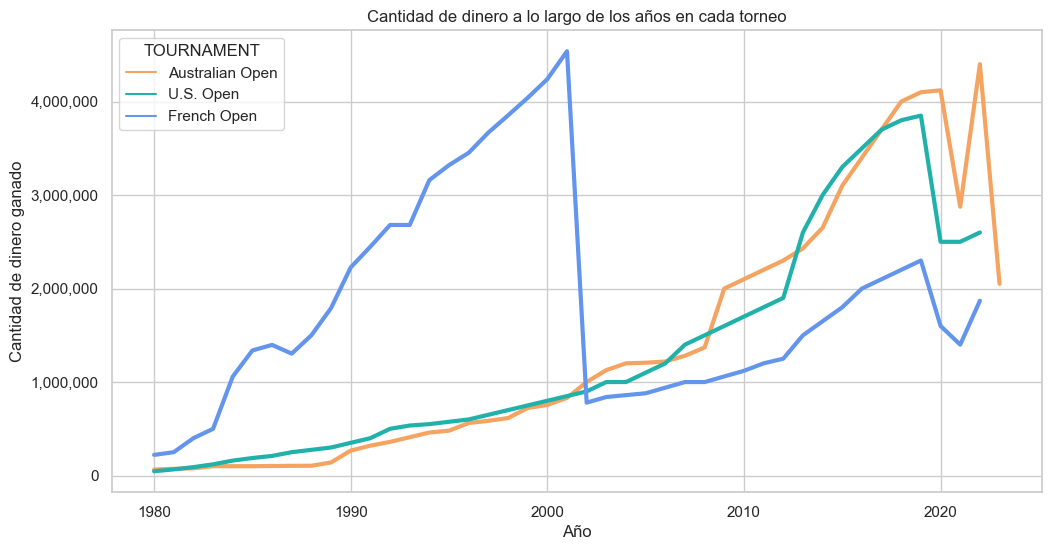

In [63]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_torneos,
x='YEAR',
y='WINNER_PRIZE',
hue='TOURNAMENT',
linewidth=3.0,
palette=['sandybrown','lightseagreen','cornflowerblue','green'])
plt.title("Cantidad de dinero a lo largo de los años en cada torneo")
plt.xlabel("Año")
plt.ylabel("Cantidad de dinero ganado")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.plot()